# Lab 1: Cleaning data

Intro to Data Science

Christian Basso

August 31, 2023

# Introduction
This program features a dataset of 986 various property transactions in California. Each entry contains an address, zipcode, price, state, city, square feet, number of beds, number of bathrooms, property type, latitude and longitude, and sale date. The origins of this dataset are unknown.

This program aims to analyze this dataset aswell as polish it for hypothetical machine learning model uses. Each variable will be visualized by frequency to best demonstrate trends among these properties.
To prepare this dataset for modeling, variables will be converted to perfered data types depending on their uniqueness and value to the overall dataset. New columns will be added to the dataset based on existing columns to further understanding of each data entry. Additionally, outliers and unknown data will be left ommited from the set.  

In [37]:
import pandas
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Loading Data

In [38]:
realestate = pandas.read_csv('Sacramentorealestatetransactions.csv')


Using .drop to remove first row of headers

In [39]:
realestate.drop(index=realestate.index[0], axis=0, inplace=True)

In [40]:
realestate.head(10)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979
10,645 MORRISON AVE,SACRAMENTO,95838,CA,3,2,909,Residential,Wed May 21 00:00:00 EDT 2008,100309,38.637663,-121.451520


In [41]:
realestate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 1 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     984 non-null    object 
 1   city       984 non-null    object 
 2   zip        984 non-null    int64  
 3   state      984 non-null    object 
 4   beds       984 non-null    int64  
 5   baths      984 non-null    int64  
 6   sq__ft     984 non-null    int64  
 7   type       984 non-null    object 
 8   sale_date  984 non-null    object 
 9   price      984 non-null    int64  
 10  latitude   984 non-null    float64
 11  longitude  984 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


Looking at this data, each data point (representing a house) has characteristic data including, street name, a city, zip code, state abbreviation, number of beds, baths, square feet, property type, longitude, and latitude. Each data point also has sales data that includes the sale date and price.

The address, city, and property type can be infered as strings, as they do not souly hold numeric value. The zip code, beds, baths, square feet, and price can be infered as integers since it is common to not use decimal precision in these measurements. Latitude and longitude are both floats to account for the requiste decimals in their repective feilds. The sale date column could be represented as a string object, or a date object depending on it use case later in this program.

To find if there are any null values, the isnull() method is called.

In [42]:
print(realestate.isnull().sum())

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64


In this set, there are no null values.

# Part 2: Representing Categorical Variables

To count the number of unique values in spesific columns, .nunique is used.

In [43]:
print(realestate.nunique())

street       980
city          39
zip           68
state          1
beds           8
baths          6
sq__ft       603
type           4
sale_date      5
price        604
latitude     968
longitude    966
dtype: int64


Looking at the cell above, one can see there are a range of uniqueness among the columns. If this data was being prepared for a learning model, it would be most helpful for the columns with the least amount of variety to be turned into catigorical variables. These columns include city, state, zip, beds, baths, and type.

To convert these variables to catigorial data, astype() is used.

In [44]:
realestate.astype({'city': 'category'})
realestate.astype({'state': 'category'})
realestate.astype({'zip': 'category'})
realestate.astype({'beds': 'category'})
realestate.astype({'baths': 'category'})
realestate.astype({'type': 'category'})

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


# Part 3: Exploring Continuous Data

To better visualize some of the continuous variables (columns, square footage, longitude, and latitude), a histogram can be plotted in a using the built in histogram function in pandas.

array([[<Axes: title={'center': 'sq__ft'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'latitude'}>, <Axes: >]], dtype=object)

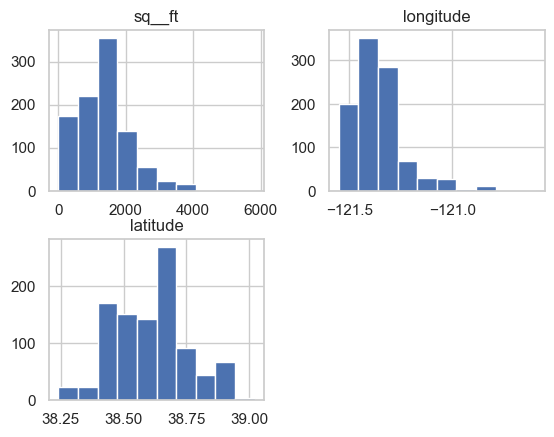

In [45]:
realestate.hist(column = ['sq__ft', 'longitude', 'latitude'])

Analyzing the histograms above, there is an odd spike in the latitidue graph around 38.7. This is odd considering latitude measures location rather than a quantitative amount, such as square feet or number of bathrooms. This spike means that approx. 280 of these data points are in a (more or less) straight line laterally.

# Part 4: Exploring Categorical Data

Visualizing lower variety columns in bar charts can be helpful to further understand poularity among repeated categorical variables. Using the seaborn library, beds, baths, type, state, city, and zip codes will be put into bar charts.

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

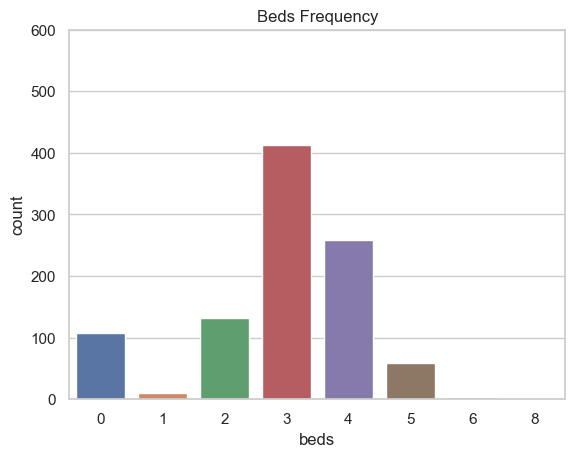

In [46]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=realestate["beds"])
plt.title("Beds Frequency")
ax.set_ylim(0, 600)
plt.show()


The bedroom frequency histogram visualizes the spread of rooms per property in this data set. Similar to the bath frequency graph below, there are many properties with no rooms. One may think these could qualify as studio properties, but there is the same amount of properties with zero bathrooms. This can be interpreted that each of these data entries are empty lot properties.

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

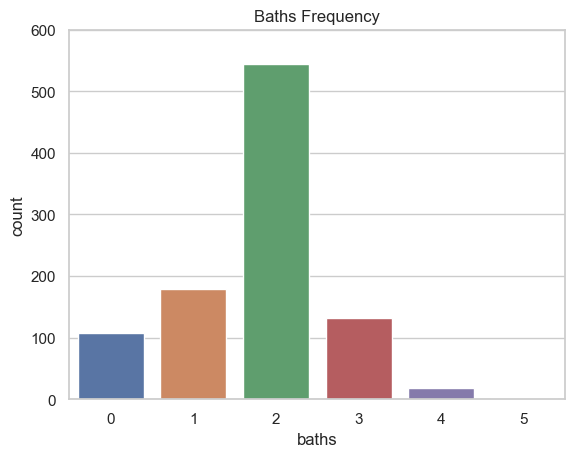

In [47]:
ax = sns.countplot(x=realestate["baths"])
plt.title("Baths Frequency")
ax.set_ylim(0,600)
plt.show()

A baths frequency histogram visualises that most properties in this dataset have 2 bathrooms. As mentioned above in the beds frequency chart, the data entries with zero bathrooms are empty property lots.

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

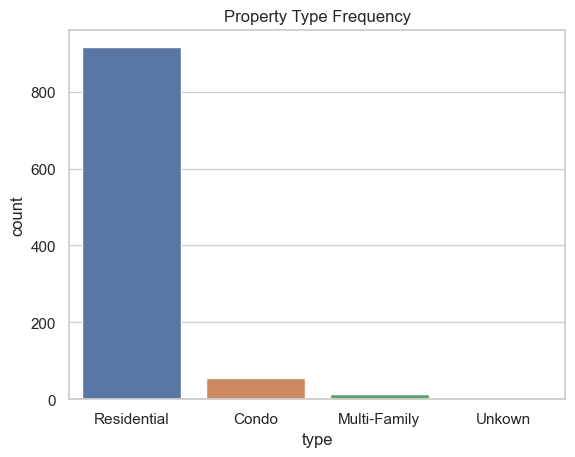

In [48]:
sns.countplot(x=realestate["type"])
plt.title("Property Type Frequency")
plt.show()

Looking at the type frequency chart, there is another interesting observation. There is an "unknown" column in the bathroom chart. This is is not an unrecognizable variable, it is part of the data set. The original set contains the "unknown" (or in this case 'unkown') keyword, thus it was put in its own category.
Additionally, this chart shows the significant bias towards residiential property types compared to condos or mutli-family housing in this data set.

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

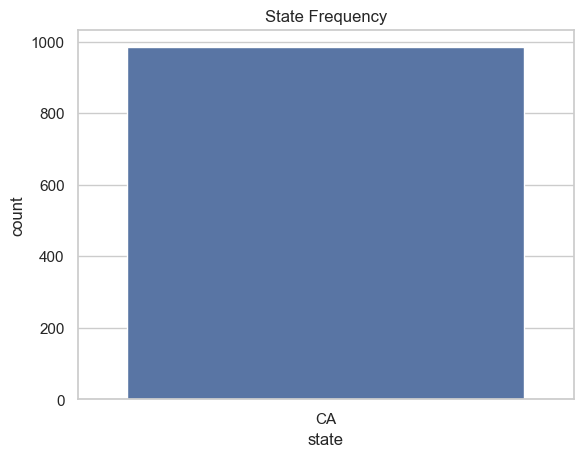

In [49]:
sns.countplot(x=realestate["state"])
plt.title("State Frequency")
plt.show()

The state frequency chart makes it clear that the set only contains properties from California.

The city and zip graphs will each be split into multiple graphs due to sizing constaints.

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

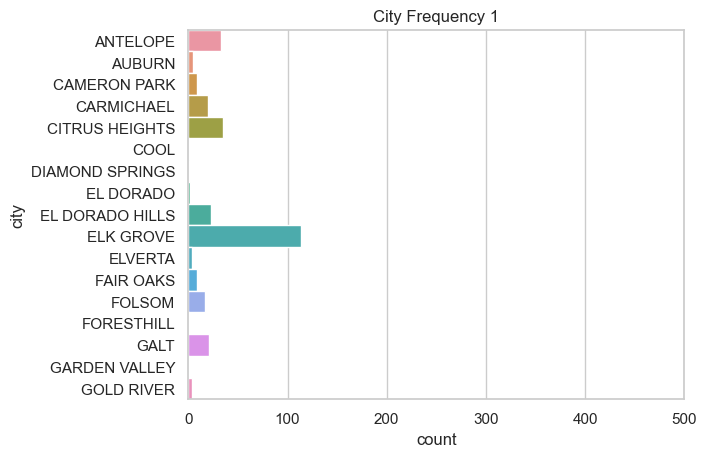

In [50]:
city = realestate["city"]
city = city.sort_values()
ax = sns.countplot(y=city.iloc[:300], width = 1)
ax.set_xlim(0,500)
plt.title("City Frequency 1")
plt.show()

The first city frequency chart plots each unique city on the y axis, and its respective frequency on the x axis.

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

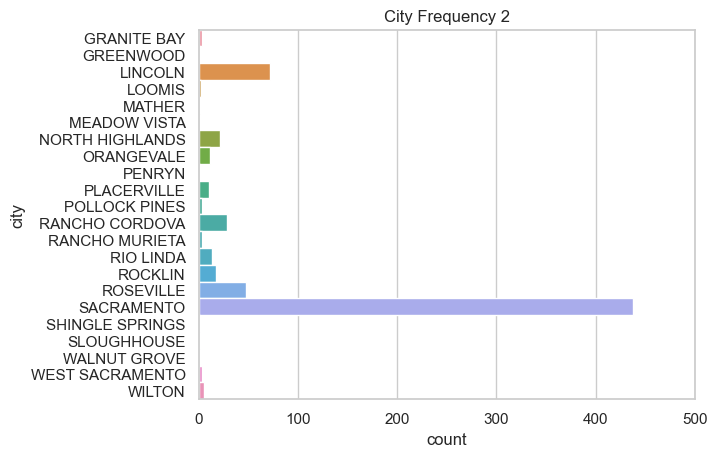

In [51]:
ax = sns.countplot(y=city.iloc[300:], width = 1)
ax.set_xlim(0,500)
plt.title("City Frequency 2")
plt.show()

The second of the two city frequency charts illistrates that this data set has the most properties in Sacramento by a factor of 4x.

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

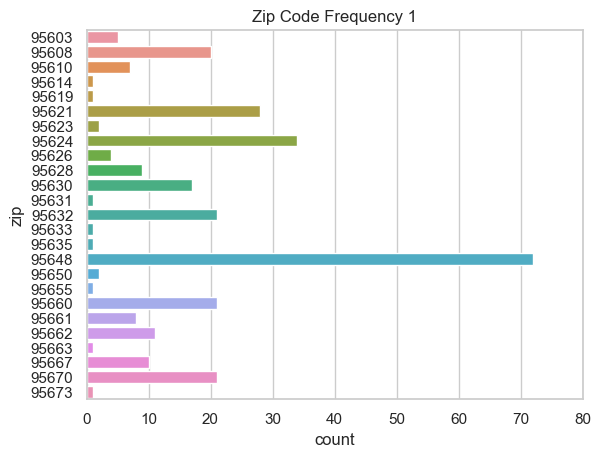

In [52]:
zipcodes = realestate["zip"]
zipcodes = zipcodes.sort_values()
ax = sns.countplot(y = zipcodes.iloc[:300])
ax.set_xlim(0,80)
plt.title("Zip Code Frequency 1")
plt.show()

The first installament of the zip code frequency chart takes rows 0-300 in the zipcode column of the original dataset. Each unique zipcode is plotted on the y axis, while its frequency is shown on the x axis. This graph shows that the 95648 zip code has the most properties within it.

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

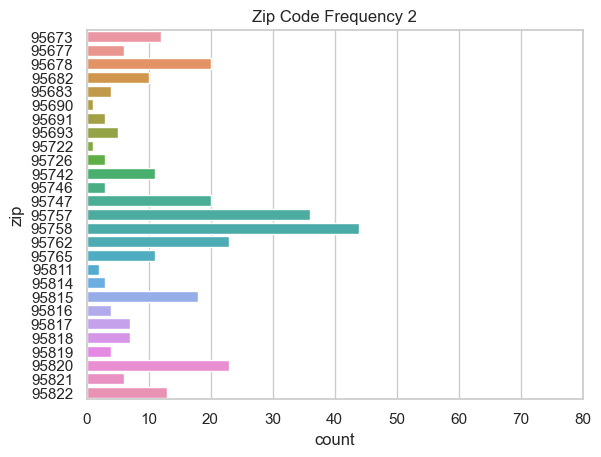

In [53]:
ax = sns.countplot(y = zipcodes.iloc[300:600])
ax.set_xlim(0,80)
plt.title("Zip Code Frequency 2")
plt.show()

The second installament of the zip code frequency chart takes rows 300-600 in the zipcode column of the original dataset. 

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

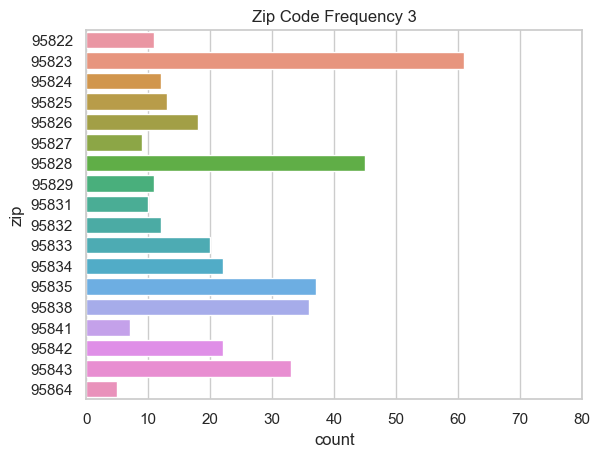

In [54]:
ax = sns.countplot(y = zipcodes.iloc[600:])
ax.set_xlim(0,80)
plt.title("Zip Code Frequency 3")
plt.show()

The final installament of the zip code frequency chart takes rows 600-986 in the zipcode column of the original dataset. 

# Part 5: Engineering New Variables

Some properties in this set are empty lots. The column 'empty_lot' will be added and set to true if the square feet of the property is 0.

In [55]:
realestate["empty_lot"] = realestate["sq__ft"] == 0
realestate.head(100)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,4818 BRITTNEY LEE CT,SACRAMENTO,95841,CA,4,2,1921,Residential,Wed May 21 00:00:00 EDT 2008,254200,38.653917,-121.342180,False
97,5529 LAGUNA PARK DR,ELK GROVE,95758,CA,5,3,2790,Residential,Wed May 21 00:00:00 EDT 2008,258000,38.425680,-121.438062,False
98,230 CANDELA CIR,SACRAMENTO,95835,CA,3,2,1541,Residential,Wed May 21 00:00:00 EDT 2008,260000,38.656251,-121.547572,False
99,4900 71ST ST,SACRAMENTO,95820,CA,3,1,1018,Residential,Wed May 21 00:00:00 EDT 2008,260014,38.531510,-121.421089,False


C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

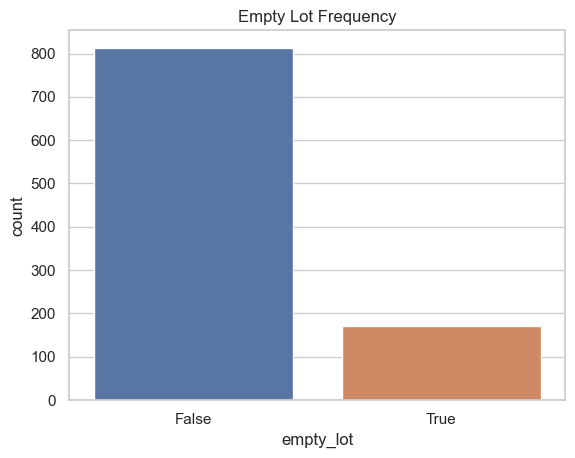

In [56]:
sns.countplot(x=realestate["empty_lot"])
plt.title("Empty Lot Frequency")
plt.show()

The empty lot frequency histogram describes that there is ~180 empty lot properties in this set of 986 properties. Since this data was fabricated by the square foot column, therefore there will be no "unknown" data in this chart.

# Part 6: Engeering New Variables Cont.

Now lets analyze some loose ends in regards to our variables. Up first is street addresses.

In [57]:
print("Number of unique steet addresses: " + str(realestate["street"].nunique()))

Number of unique steet addresses: 980


Given that there are just shy of 1000 entries in this csv, having 980 unique street addresses would be far too many to be useful in a machine learning model. Beyond that, it serves no use in the context of this dataset since its frequency is nearly always 1.

To make use of the street addresses, the street suffix will be extracted to create a new column names "atreet_type". This will help locate the noise level and traffic near the property.

First, a list of street suffixes will be needed as a reference point.

In [58]:
realestate.head(20)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,False
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,False
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,False
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,False
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,False
10,645 MORRISON AVE,SACRAMENTO,95838,CA,3,2,909,Residential,Wed May 21 00:00:00 EDT 2008,100309,38.637663,-121.451520,False


There are multiple suffixes used in this data set. There are many "ave", "way", and "drive" suffixes. A list from https://pe.usps.com/text/pub28/28apc_002.htm will be used to ensure they are all covered. 

A function "get_street_tpe" will return the suffix from the entire address. This is done by extracting the suffix from a dictionary. If there is no suffix, "unknown" is returned

In [59]:
def get_street_address(address):
    dig = any(char.isdigit() for char in address.split()[-1])
    if dig:
        return address.split()[-3]
    else:
        return address.split()[-1]

In [60]:
def get_street_address(address):
    suffixes = {
    "AVE": "Avenue",
    "BLVD": "Boulevard",
    "CT": "Court",
    "DR": "Drive",
    "LN": "Lane",
    "PKWY": "Parkway",
    "PL": "Place",
    "RD": "Road",
    "ST": "Street",
    "TER": "Terrace",
    "TRL": "Trail",
    "WAY": "Way",
    "LOOP": "Loop",
    "WALK": "Walk",
    "CIR": "Circle",
    "HL": "Hill"
    }

    for k, v in suffixes.items():
        if k in address:
            return v
    return "unknown"



Lets test it.

In [61]:
print(get_street_address("123 north park BLVD"))
print(get_street_address("123 north park BLVD unit 10"))
print(get_street_address("123 north park BLVD unit 10C"))

Boulevard
Boulevard
Boulevard


Now to add the new column to the dataFrame.

In [62]:
realestate["street_type"] = realestate["street"].apply(lambda x: get_street_address(x))

In [63]:
realestate.head(10)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot,street_type
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False,Court
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False,Street
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False,Way
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False,Drive
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,False,Court
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,False,Way
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,False,Avenue
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,False,Drive
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,False,Street
10,645 MORRISON AVE,SACRAMENTO,95838,CA,3,2,909,Residential,Wed May 21 00:00:00 EDT 2008,100309,38.637663,-121.451520,False,Avenue


To visualize this data, the street types will be put into a count plot.

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

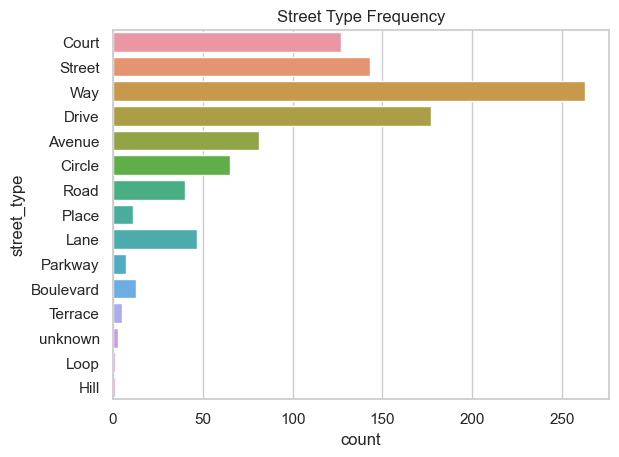

In [64]:
sns.countplot(y=realestate["street_type"])
plt.title("Street Type Frequency")
plt.show()

## Part 7: Identifying Potential Label Variables
The key difference between regression and classification is that regression handles continous values while classificaion handles discrete values. In this study, a discrete value that would be well set up for regression would be square feet. A model could be given price, beds, and baths to give an accurate axproximation on what its square footage should be. A classification model could use street names and cities to predict if the street will be busy in the morning. These continuous variable are similar to the categorical variables we made above, as they would be used to predict a "will it" question, rather than a regressive "what is" question.

## Part 8: Removing Outliers

While making charts of the property type, an "unkown" tag was used. Lets find it and clear that data point from the dataframe.

In [65]:
index = realestate.loc[realestate['type'] == 'Unkown'].index.values
print(index)

[757]


In [66]:
realestate = realestate.drop(index = 757)

In [67]:
realestate.head(757)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot,street_type
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False,Court
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False,Street
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False,Way
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False,Drive
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,False,Court
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,1251 GREEN RAVINE DR,LINCOLN,95648,CA,4,2,0,Residential,Fri May 16 00:00:00 EDT 2008,267750,38.881560,-121.301343,True,Drive
754,6001 SHOO FLY RD,PLACERVILLE,95667,CA,0,0,0,Residential,Fri May 16 00:00:00 EDT 2008,270000,38.813546,-120.809254,True,Road
755,3040 PARKHAM DR,ROSEVILLE,95747,CA,0,0,0,Residential,Fri May 16 00:00:00 EDT 2008,271000,38.770835,-121.366996,True,Drive
756,2674 TAM O SHANTER DR,EL DORADO HILLS,95762,CA,4,2,0,Residential,Fri May 16 00:00:00 EDT 2008,272700,38.695801,-121.079216,True,Drive


# Part 9: Save The New CSV

In [68]:
realestate.to_csv("clean_cali_housing.csv", index=False)

# Conclusion
This program analyzes, visualizes, and cleans the California property sales history dataset in preperation for its hypothetical use in a machine learning model with a focus on regressional or discrete data. To furhter investigate this dataset, price history could be added to visualize how the properties have rasied or fallen in value, this would greatly contribute to modeling potential in regards to the value of these properties in the future.